# Deep learning BCI
I use tensorflow and keras to train the model which was really not showing no progress. I am happy to say that I have increased the accuracy to above 60% and ther is more scope of training so I have saved the last model weights I trained it for the whole friday starting from 9 A.M in the morning till evening 5P.M I wanted to train more but the building was about to lock down so I was not able to. I will try again from where I stop at the end of the day and see how it goes after that.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
import h5py
from keras.models import model_from_json
import os

Using TensorFlow backend.


In [2]:
data_frame=pd.read_csv('raw_data_labeled.csv')

In [3]:
y=data_frame['Frequency']
X=data_frame

In [4]:
X.drop("Frequency", axis = 1, inplace = True)

In [5]:

encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)
dummy_y = np_utils.to_categorical(encoded_y)

In [7]:
dummy_y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

## Run the below cells only as an alternative

In [70]:
def model():
    model=Sequential()
    model.add(Dense(512,activation='relu',  input_shape=(16,)))
    model.add(Dropout(.2))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(.2))
    model.add(Dense(512,activation='relu'))
    model.add(Dropout(.1))
    model.add(Dense(8,activation='softmax'))
    opt=SGD(lr=.001,momentum=0.01, decay=0.1)
    model.compile(opt,loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [71]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_scor

In [74]:
estimator = KerasClassifier(build_fn=model, epochs=100, batch_size=128, verbose=0)

In [75]:
kfold = KFold(n_splits=100, shuffle=True, random_state=121)
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

KeyboardInterrupt: 

# Upto here Always skip till this cell

In [22]:
model=Sequential()
model.add(Dense(1024,activation='relu',  input_shape=(16,)))
model.add(Dropout(.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(.1))
model.add(Dense(8,activation='softmax'))
opt=SGD(lr=.1)
model.compile(opt,loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 1024)              17408     
_________________________________________________________________
dropout_16 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               131200    
_________________________________________________________________
dropout_17 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 512)               66048     
_________________________________________________________________
dropout_18 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 64)                32832     
__________

We got 50,888 parametersto train lets see by running it for a small number of epochs initially

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,dummy_y, test_size=.33)

In [23]:
history=model.fit(X_train, y_train, epochs = 1000, batch_size = 10000)

Epoch 1/1000
60779/60779 [==============================] - 2s 39us/step - loss: 2.1207 - acc: 0.1244
Epoch 2/1000
60779/60779 [==============================] - 2s 33us/step - loss: 2.0927 - acc: 0.1232
Epoch 3/1000
60779/60779 [==============================] - 2s 35us/step - loss: 2.0878 - acc: 0.1256
Epoch 4/1000
60779/60779 [==============================] - 2s 34us/step - loss: 2.0863 - acc: 0.1249
Epoch 5/1000
60779/60779 [==============================] - 2s 34us/step - loss: 2.0845 - acc: 0.1242
Epoch 6/1000
60779/60779 [==============================] - 2s 33us/step - loss: 2.0834 - acc: 0.1244
Epoch 7/1000
60779/60779 [==============================] - 2s 33us/step - loss: 2.0838 - acc: 0.1242
Epoch 8/1000
60779/60779 [==============================] - 2s 33us/step - loss: 2.0820 - acc: 0.1267
Epoch 9/1000
60779/60779 [==============================] - 2s 33us/step - loss: 2.0823 - acc: 0.1271
Epoch 10/1000
60779/60779 [==============================] - 2s 33us/step - loss: 

60779/60779 [==============================] - 2s 33us/step - loss: 2.0525 - acc: 0.1562
Epoch 160/1000
60779/60779 [==============================] - 2s 34us/step - loss: 2.0521 - acc: 0.1534
Epoch 161/1000
60779/60779 [==============================] - 2s 38us/step - loss: 2.0521 - acc: 0.1565
Epoch 162/1000
60779/60779 [==============================] - 2s 36us/step - loss: 2.0511 - acc: 0.1572
Epoch 163/1000
60779/60779 [==============================] - 2s 33us/step - loss: 2.0517 - acc: 0.1551
Epoch 164/1000
60779/60779 [==============================] - 2s 33us/step - loss: 2.0512 - acc: 0.1567
Epoch 165/1000
60779/60779 [==============================] - 2s 33us/step - loss: 2.0514 - acc: 0.1559
Epoch 166/1000
60779/60779 [==============================] - 2s 32us/step - loss: 2.0508 - acc: 0.1564
Epoch 167/1000
60779/60779 [==============================] - 2s 33us/step - loss: 2.0512 - acc: 0.1574
Epoch 168/1000
60779/60779 [==============================] - 2s 33us/step - lo

60779/60779 [==============================] - 2s 32us/step - loss: 2.0333 - acc: 0.1714
Epoch 316/1000
60779/60779 [==============================] - 2s 32us/step - loss: 2.0337 - acc: 0.1713
Epoch 317/1000
60779/60779 [==============================] - 2s 32us/step - loss: 2.0344 - acc: 0.1719
Epoch 318/1000
60779/60779 [==============================] - 2s 33us/step - loss: 2.0339 - acc: 0.1720
Epoch 319/1000
60779/60779 [==============================] - 2s 33us/step - loss: 2.0328 - acc: 0.1725
Epoch 320/1000
60779/60779 [==============================] - 2s 32us/step - loss: 2.0337 - acc: 0.1727
Epoch 321/1000
60779/60779 [==============================] - 2s 33us/step - loss: 2.0330 - acc: 0.1725
Epoch 322/1000
60779/60779 [==============================] - 2s 32us/step - loss: 2.0321 - acc: 0.1730
Epoch 323/1000
60779/60779 [==============================] - 2s 32us/step - loss: 2.0333 - acc: 0.1720
Epoch 324/1000
60779/60779 [==============================] - 2s 33us/step - lo

60779/60779 [==============================] - 2s 34us/step - loss: 2.0166 - acc: 0.1854
Epoch 472/1000
60779/60779 [==============================] - 2s 33us/step - loss: 2.0171 - acc: 0.1848
Epoch 473/1000
60779/60779 [==============================] - 2s 35us/step - loss: 2.0168 - acc: 0.1844
Epoch 474/1000
60779/60779 [==============================] - 2s 33us/step - loss: 2.0175 - acc: 0.1854
Epoch 475/1000
60779/60779 [==============================] - 2s 32us/step - loss: 2.0181 - acc: 0.1828
Epoch 476/1000
60779/60779 [==============================] - 2s 33us/step - loss: 2.0167 - acc: 0.1860
Epoch 477/1000
60779/60779 [==============================] - 2s 32us/step - loss: 2.0169 - acc: 0.1843
Epoch 478/1000
60779/60779 [==============================] - 2s 33us/step - loss: 2.0170 - acc: 0.1839
Epoch 479/1000
60779/60779 [==============================] - 2s 33us/step - loss: 2.0164 - acc: 0.1866
Epoch 480/1000
60779/60779 [==============================] - 2s 33us/step - lo

60779/60779 [==============================] - 2s 33us/step - loss: 2.0011 - acc: 0.1947
Epoch 628/1000
60779/60779 [==============================] - 2s 32us/step - loss: 2.0009 - acc: 0.1953
Epoch 629/1000
60779/60779 [==============================] - 2s 32us/step - loss: 2.0001 - acc: 0.1953
Epoch 630/1000
60779/60779 [==============================] - 2s 33us/step - loss: 2.0020 - acc: 0.1943
Epoch 631/1000
60779/60779 [==============================] - 2s 32us/step - loss: 2.0010 - acc: 0.1945
Epoch 632/1000
60779/60779 [==============================] - 2s 32us/step - loss: 2.0007 - acc: 0.1933
Epoch 633/1000
60779/60779 [==============================] - 2s 33us/step - loss: 2.0005 - acc: 0.1949
Epoch 634/1000
60779/60779 [==============================] - 2s 33us/step - loss: 2.0002 - acc: 0.1931
Epoch 635/1000
60779/60779 [==============================] - 2s 35us/step - loss: 2.0004 - acc: 0.1940
Epoch 636/1000
60779/60779 [==============================] - 2s 35us/step - lo

60779/60779 [==============================] - 2s 33us/step - loss: 1.9858 - acc: 0.2040
Epoch 784/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.9828 - acc: 0.2056
Epoch 785/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.9845 - acc: 0.2048
Epoch 786/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.9850 - acc: 0.2060
Epoch 787/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.9843 - acc: 0.2054
Epoch 788/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.9866 - acc: 0.2035
Epoch 789/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.9833 - acc: 0.2061
Epoch 790/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.9851 - acc: 0.2039
Epoch 791/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.9837 - acc: 0.2043
Epoch 792/1000
60779/60779 [==============================] - 2s 33us/step - lo

60779/60779 [==============================] - 2s 33us/step - loss: 1.9698 - acc: 0.2128
Epoch 940/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.9701 - acc: 0.2139
Epoch 941/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.9704 - acc: 0.2141
Epoch 942/1000
60779/60779 [==============================] - 2s 34us/step - loss: 1.9696 - acc: 0.2131
Epoch 943/1000
60779/60779 [==============================] - 2s 34us/step - loss: 1.9703 - acc: 0.2133
Epoch 944/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.9673 - acc: 0.2144
Epoch 945/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9714 - acc: 0.2127
Epoch 946/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.9674 - acc: 0.2136
Epoch 947/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.9684 - acc: 0.2134
Epoch 948/1000
60779/60779 [==============================] - 2s 33us/step - lo

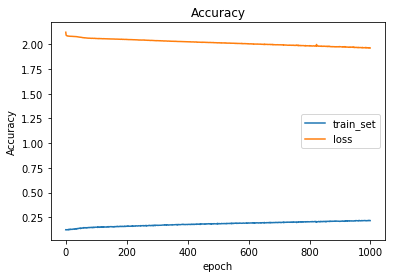

In [25]:
plt.plot(history.history['acc'],label='train_set')
plt.plot(history.history['loss'], label='loss')
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend()

In [26]:

checkpoint_filepath = 'weights.best.my.hdf5'

my_checkpointer = ModelCheckpoint(filepath=checkpoint_filepath,
                               verbose=1, save_best_only=True)

history=model.fit(X_train, y_train, epochs = 1000, batch_size = 10000, callbacks=[my_checkpointer], verbose=1)

Epoch 1/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.9633 - acc: 0.2198
Epoch 2/1000


/usr/local/lib/python3.5/dist-packages/keras/callbacks.py:434: RuntimeWarning: Can save best model only with val_loss available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


60779/60779 [==============================] - 2s 34us/step - loss: 1.9616 - acc: 0.2187
Epoch 3/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9620 - acc: 0.2180
Epoch 4/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9632 - acc: 0.2181
Epoch 5/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9616 - acc: 0.2177
Epoch 6/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9650 - acc: 0.2181
Epoch 7/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9624 - acc: 0.2173
Epoch 8/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9636 - acc: 0.2160
Epoch 9/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9605 - acc: 0.2186
Epoch 10/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9620 - acc: 0.2187
Epoch 11/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9628 - acc

60779/60779 [==============================] - 2s 33us/step - loss: 1.9456 - acc: 0.2279
Epoch 161/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9451 - acc: 0.2313
Epoch 162/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.9449 - acc: 0.2300
Epoch 163/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9457 - acc: 0.2304
Epoch 164/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.9503 - acc: 0.2273
Epoch 165/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9447 - acc: 0.2297
Epoch 166/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9473 - acc: 0.2269
Epoch 167/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9448 - acc: 0.2295
Epoch 168/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9436 - acc: 0.2307
Epoch 169/1000
60779/60779 [==============================] - 2s 33us/step - lo

60779/60779 [==============================] - 2s 32us/step - loss: 1.9304 - acc: 0.2385
Epoch 317/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9273 - acc: 0.2387
Epoch 318/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9283 - acc: 0.2378
Epoch 319/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9255 - acc: 0.2411
Epoch 320/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9270 - acc: 0.2360
Epoch 321/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9305 - acc: 0.2374
Epoch 322/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9264 - acc: 0.2392
Epoch 323/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9275 - acc: 0.2412
Epoch 324/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9316 - acc: 0.2362
Epoch 325/1000
60779/60779 [==============================] - 2s 32us/step - lo

60779/60779 [==============================] - 2s 33us/step - loss: 1.9101 - acc: 0.2487
Epoch 473/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9114 - acc: 0.2509
Epoch 474/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9090 - acc: 0.2491
Epoch 475/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9121 - acc: 0.2485
Epoch 476/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.9102 - acc: 0.2472
Epoch 477/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9087 - acc: 0.2497
Epoch 478/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9096 - acc: 0.2485
Epoch 479/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9085 - acc: 0.2499
Epoch 480/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9096 - acc: 0.2507
Epoch 481/1000
60779/60779 [==============================] - 2s 32us/step - lo

60779/60779 [==============================] - 2s 32us/step - loss: 1.8986 - acc: 0.2552
Epoch 629/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.8915 - acc: 0.2600
Epoch 630/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.8959 - acc: 0.2602
Epoch 631/1000
60779/60779 [==============================] - 2s 32us/step - loss: 2.2754 - acc: 0.2053
Epoch 632/1000
60779/60779 [==============================] - 2s 32us/step - loss: 2.0079 - acc: 0.1957
Epoch 633/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9858 - acc: 0.2062
Epoch 634/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9777 - acc: 0.2121
Epoch 635/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9672 - acc: 0.2185
Epoch 636/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9613 - acc: 0.2206
Epoch 637/1000
60779/60779 [==============================] - 2s 32us/step - lo

60779/60779 [==============================] - 2s 33us/step - loss: 1.8758 - acc: 0.2687
Epoch 785/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.8744 - acc: 0.2698
Epoch 786/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8783 - acc: 0.2662
Epoch 787/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8755 - acc: 0.2708
Epoch 788/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8752 - acc: 0.2672
Epoch 789/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.8809 - acc: 0.2652
Epoch 790/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8796 - acc: 0.2670
Epoch 791/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8703 - acc: 0.2703
Epoch 792/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8774 - acc: 0.2680
Epoch 793/1000
60779/60779 [==============================] - 2s 33us/step - lo

60779/60779 [==============================] - 2s 33us/step - loss: 1.8555 - acc: 0.2806
Epoch 941/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8534 - acc: 0.2788
Epoch 942/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8539 - acc: 0.2790
Epoch 943/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8555 - acc: 0.2795
Epoch 944/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8550 - acc: 0.2813
Epoch 945/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8563 - acc: 0.2785
Epoch 946/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8557 - acc: 0.2789
Epoch 947/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8580 - acc: 0.2803
Epoch 948/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8517 - acc: 0.2822
Epoch 949/1000
60779/60779 [==============================] - 2s 33us/step - lo

In [27]:
history=model.fit(X_train, y_train, epochs = 1000, batch_size = 20000, callbacks=[my_checkpointer], verbose=1)

Epoch 1/1000
60779/60779 [==============================] - 2s 34us/step - loss: 1.8632 - acc: 0.2773
Epoch 2/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8590 - acc: 0.2824
Epoch 3/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8478 - acc: 0.2844
Epoch 4/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8524 - acc: 0.2802
Epoch 5/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8490 - acc: 0.2808
Epoch 6/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8591 - acc: 0.2818
Epoch 7/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8566 - acc: 0.2794
Epoch 8/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8528 - acc: 0.2834
Epoch 9/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8630 - acc: 0.2797
Epoch 10/1000
60779/60779 [==============================] - 2s 33us/step - loss: 

60779/60779 [==============================] - 2s 33us/step - loss: 1.8436 - acc: 0.2866
Epoch 160/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8514 - acc: 0.2807
Epoch 161/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8432 - acc: 0.2861
Epoch 162/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8420 - acc: 0.2862
Epoch 163/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8428 - acc: 0.2873
Epoch 164/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8393 - acc: 0.2894
Epoch 165/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8523 - acc: 0.2821
Epoch 166/1000
60779/60779 [==============================] - 2s 34us/step - loss: 1.8435 - acc: 0.2874
Epoch 167/1000
60779/60779 [==============================] - 2s 37us/step - loss: 1.8433 - acc: 0.2865
Epoch 168/1000
60779/60779 [==============================] - 2s 37us/step - lo

60779/60779 [==============================] - 2s 33us/step - loss: 1.8286 - acc: 0.2949
Epoch 316/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8246 - acc: 0.2948
Epoch 317/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8310 - acc: 0.2958
Epoch 318/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8325 - acc: 0.2928
Epoch 319/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8362 - acc: 0.2889
Epoch 320/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8326 - acc: 0.2920
Epoch 321/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8305 - acc: 0.2929
Epoch 322/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8268 - acc: 0.2948
Epoch 323/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8342 - acc: 0.2917
Epoch 324/1000
60779/60779 [==============================] - 2s 33us/step - lo

60779/60779 [==============================] - 2s 33us/step - loss: 1.8206 - acc: 0.3006
Epoch 472/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8215 - acc: 0.2982
Epoch 473/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8181 - acc: 0.2991
Epoch 474/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8139 - acc: 0.3033
Epoch 475/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8204 - acc: 0.2990
Epoch 476/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8212 - acc: 0.3003
Epoch 477/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8151 - acc: 0.3042
Epoch 478/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8215 - acc: 0.3014
Epoch 479/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8225 - acc: 0.2969
Epoch 480/1000
60779/60779 [==============================] - 2s 33us/step - lo

60779/60779 [==============================] - 2s 33us/step - loss: 1.8008 - acc: 0.3064
Epoch 628/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8073 - acc: 0.3056
Epoch 629/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8125 - acc: 0.3019
Epoch 630/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8032 - acc: 0.3082
Epoch 631/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8137 - acc: 0.3040
Epoch 632/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8170 - acc: 0.3032
Epoch 633/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8059 - acc: 0.3062
Epoch 634/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8082 - acc: 0.3057
Epoch 635/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8090 - acc: 0.3040
Epoch 636/1000
60779/60779 [==============================] - 2s 33us/step - lo

60779/60779 [==============================] - 2s 33us/step - loss: 1.7938 - acc: 0.3137
Epoch 784/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7933 - acc: 0.3116
Epoch 785/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7931 - acc: 0.3133
Epoch 786/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8067 - acc: 0.3087
Epoch 787/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7914 - acc: 0.3124
Epoch 788/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7924 - acc: 0.3107
Epoch 789/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7953 - acc: 0.3107
Epoch 790/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7903 - acc: 0.3128
Epoch 791/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7989 - acc: 0.3116
Epoch 792/1000
60779/60779 [==============================] - 2s 33us/step - lo

60779/60779 [==============================] - 2s 33us/step - loss: 1.7895 - acc: 0.3147
Epoch 940/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7834 - acc: 0.3203
Epoch 941/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7881 - acc: 0.3165
Epoch 942/1000
60779/60779 [==============================] - 2s 34us/step - loss: 1.7787 - acc: 0.3207
Epoch 943/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7842 - acc: 0.3178
Epoch 944/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7782 - acc: 0.3223
Epoch 945/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7805 - acc: 0.3173
Epoch 946/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7919 - acc: 0.3163
Epoch 947/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7820 - acc: 0.3162
Epoch 948/1000
60779/60779 [==============================] - 2s 33us/step - lo

In [28]:
history=model.fit(X_train, y_train, epochs = 5000, batch_size = 10000, callbacks=[my_checkpointer], verbose=1)

Epoch 1/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.7713 - acc: 0.3238
Epoch 2/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7667 - acc: 0.3247
Epoch 3/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7662 - acc: 0.3278
Epoch 4/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7692 - acc: 0.3231
Epoch 5/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7660 - acc: 0.3275
Epoch 6/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7686 - acc: 0.3265
Epoch 7/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7670 - acc: 0.3248
Epoch 8/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7625 - acc: 0.3241
Epoch 9/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7654 - acc: 0.3272
Epoch 10/5000
60779/60779 [==============================] - 2s 33us/step - loss: 

60779/60779 [==============================] - 2s 33us/step - loss: 1.7467 - acc: 0.3384
Epoch 160/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7448 - acc: 0.3371
Epoch 161/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7459 - acc: 0.3360
Epoch 162/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7469 - acc: 0.3349
Epoch 163/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7488 - acc: 0.3367
Epoch 164/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7457 - acc: 0.3350
Epoch 165/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.7439 - acc: 0.3365
Epoch 166/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7450 - acc: 0.3377
Epoch 167/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7430 - acc: 0.3381
Epoch 168/5000
60779/60779 [==============================] - 2s 33us/step - lo

60779/60779 [==============================] - 2s 33us/step - loss: 1.7261 - acc: 0.3461
Epoch 316/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7238 - acc: 0.3476
Epoch 317/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7255 - acc: 0.3444
Epoch 318/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7235 - acc: 0.3476
Epoch 319/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7253 - acc: 0.3495
Epoch 320/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7270 - acc: 0.3467
Epoch 321/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7262 - acc: 0.3449
Epoch 322/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7269 - acc: 0.3455
Epoch 323/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7274 - acc: 0.3453
Epoch 324/5000
60779/60779 [==============================] - 2s 33us/step - lo

60779/60779 [==============================] - 2s 33us/step - loss: 1.6995 - acc: 0.3601
Epoch 472/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6986 - acc: 0.3599
Epoch 473/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6991 - acc: 0.3604
Epoch 474/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7117 - acc: 0.3528
Epoch 475/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6998 - acc: 0.3589
Epoch 476/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7058 - acc: 0.3555
Epoch 477/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7032 - acc: 0.3579
Epoch 478/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6962 - acc: 0.3576
Epoch 479/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6933 - acc: 0.3625
Epoch 480/5000
60779/60779 [==============================] - 2s 33us/step - lo

60779/60779 [==============================] - 2s 33us/step - loss: 1.6784 - acc: 0.3704
Epoch 628/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6759 - acc: 0.3704
Epoch 629/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.6734 - acc: 0.3692
Epoch 630/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.6733 - acc: 0.3721
Epoch 631/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6874 - acc: 0.3678
Epoch 632/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6898 - acc: 0.3665
Epoch 633/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6711 - acc: 0.3726
Epoch 634/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.6755 - acc: 0.3712
Epoch 635/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.6769 - acc: 0.3727
Epoch 636/5000
60779/60779 [==============================] - 2s 32us/step - lo

60779/60779 [==============================] - 2s 33us/step - loss: 1.6590 - acc: 0.3773
Epoch 784/5000
60779/60779 [==============================] - 2s 35us/step - loss: 1.6537 - acc: 0.3832
Epoch 785/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.6469 - acc: 0.3842
Epoch 786/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6571 - acc: 0.3808
Epoch 787/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6606 - acc: 0.3787
Epoch 788/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6581 - acc: 0.3791
Epoch 789/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6572 - acc: 0.3797
Epoch 790/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.6464 - acc: 0.3845
Epoch 791/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6499 - acc: 0.3807
Epoch 792/5000
60779/60779 [==============================] - 2s 33us/step - lo

60779/60779 [==============================] - 2s 33us/step - loss: 1.6299 - acc: 0.3909
Epoch 940/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6280 - acc: 0.3958
Epoch 941/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6241 - acc: 0.3944
Epoch 942/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6413 - acc: 0.3894
Epoch 943/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6336 - acc: 0.3927
Epoch 944/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6256 - acc: 0.3953
Epoch 945/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6320 - acc: 0.3936
Epoch 946/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6278 - acc: 0.3957
Epoch 947/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6272 - acc: 0.3958
Epoch 948/5000
60779/60779 [==============================] - 2s 33us/step - lo

60779/60779 [==============================] - 2s 33us/step - loss: 1.6040 - acc: 0.4046
Epoch 1096/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6100 - acc: 0.4024
Epoch 1097/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6127 - acc: 0.4025
Epoch 1098/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6134 - acc: 0.4019
Epoch 1099/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6111 - acc: 0.4038
Epoch 1100/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.6103 - acc: 0.4021
Epoch 1101/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6112 - acc: 0.4037
Epoch 1102/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6101 - acc: 0.4028
Epoch 1103/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.5982 - acc: 0.4058
Epoch 1104/5000
60779/60779 [==============================] - 2s 32us/

60779/60779 [==============================] - 2s 32us/step - loss: 1.5780 - acc: 0.4162
Epoch 1252/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5768 - acc: 0.4183
Epoch 1253/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.5865 - acc: 0.4151
Epoch 1254/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5898 - acc: 0.4113
Epoch 1255/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.5921 - acc: 0.4101
Epoch 1256/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5910 - acc: 0.4108
Epoch 1257/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5846 - acc: 0.4142
Epoch 1258/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5830 - acc: 0.4159
Epoch 1259/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5820 - acc: 0.4185
Epoch 1260/5000
60779/60779 [==============================] - 2s 32us/

60779/60779 [==============================] - 2s 33us/step - loss: 1.5640 - acc: 0.4224
Epoch 1408/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5675 - acc: 0.4231
Epoch 1409/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5688 - acc: 0.4244
Epoch 1410/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5659 - acc: 0.4225
Epoch 1411/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5755 - acc: 0.4202
Epoch 1412/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5667 - acc: 0.4225
Epoch 1413/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5668 - acc: 0.4225
Epoch 1414/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5611 - acc: 0.4242
Epoch 1415/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5709 - acc: 0.4188
Epoch 1416/5000
60779/60779 [==============================] - 2s 34us/

60779/60779 [==============================] - 2s 33us/step - loss: 1.5539 - acc: 0.4259
Epoch 1564/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5558 - acc: 0.4291
Epoch 1565/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5393 - acc: 0.4348
Epoch 1566/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5554 - acc: 0.4312
Epoch 1567/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5429 - acc: 0.4343
Epoch 1568/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5440 - acc: 0.4350
Epoch 1569/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5417 - acc: 0.4339
Epoch 1570/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5410 - acc: 0.4353
Epoch 1571/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5674 - acc: 0.4268
Epoch 1572/5000
60779/60779 [==============================] - 2s 33us/

60779/60779 [==============================] - 2s 33us/step - loss: 1.5290 - acc: 0.4408
Epoch 1720/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.5207 - acc: 0.4422
Epoch 1721/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5289 - acc: 0.4397
Epoch 1722/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.5212 - acc: 0.4444
Epoch 1723/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5257 - acc: 0.4406
Epoch 1724/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5239 - acc: 0.4413
Epoch 1725/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5334 - acc: 0.4401
Epoch 1726/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5265 - acc: 0.4429
Epoch 1727/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5334 - acc: 0.4411
Epoch 1728/5000
60779/60779 [==============================] - 2s 33us/

60779/60779 [==============================] - 2s 33us/step - loss: 1.5089 - acc: 0.4505
Epoch 1876/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5192 - acc: 0.4444
Epoch 1877/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5066 - acc: 0.4510
Epoch 1878/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5098 - acc: 0.4483
Epoch 1879/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5180 - acc: 0.4485
Epoch 1880/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.5087 - acc: 0.4476
Epoch 1881/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5085 - acc: 0.4480
Epoch 1882/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5078 - acc: 0.4513
Epoch 1883/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5304 - acc: 0.4434
Epoch 1884/5000
60779/60779 [==============================] - 2s 32us/

60779/60779 [==============================] - 2s 37us/step - loss: 1.4883 - acc: 0.4565
Epoch 2032/5000
60779/60779 [==============================] - 2s 41us/step - loss: 1.4862 - acc: 0.4592
Epoch 2033/5000
60779/60779 [==============================] - 2s 38us/step - loss: 1.4963 - acc: 0.4555
Epoch 2034/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.4863 - acc: 0.4590
Epoch 2035/5000
60779/60779 [==============================] - 2s 37us/step - loss: 1.4937 - acc: 0.4581
Epoch 2036/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.4883 - acc: 0.4582
Epoch 2037/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.4842 - acc: 0.4593
Epoch 2038/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.4967 - acc: 0.4583
Epoch 2039/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.4835 - acc: 0.4616
Epoch 2040/5000
60779/60779 [==============================] - 2s 36us/

60779/60779 [==============================] - 2s 33us/step - loss: 1.4733 - acc: 0.4650
Epoch 2188/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.4774 - acc: 0.4639
Epoch 2189/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.4786 - acc: 0.4657
Epoch 2190/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.4725 - acc: 0.4632
Epoch 2191/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.4744 - acc: 0.4630
Epoch 2192/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.4782 - acc: 0.4639
Epoch 2193/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.4781 - acc: 0.4642
Epoch 2194/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.4738 - acc: 0.4668
Epoch 2195/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.4718 - acc: 0.4676
Epoch 2196/5000
60779/60779 [==============================] - 2s 33us/

60779/60779 [==============================] - 2s 33us/step - loss: 1.4555 - acc: 0.4748
Epoch 2344/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.4567 - acc: 0.4735
Epoch 2345/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.4679 - acc: 0.4687
Epoch 2346/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.4595 - acc: 0.4737
Epoch 2347/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.4504 - acc: 0.4745
Epoch 2348/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.4645 - acc: 0.4707
Epoch 2349/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.4552 - acc: 0.4748
Epoch 2350/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.4603 - acc: 0.4708
Epoch 2351/5000
60779/60779 [==============================] - 2s 35us/step - loss: 1.4529 - acc: 0.4769
Epoch 2352/5000
60779/60779 [==============================] - 2s 36us/

60779/60779 [==============================] - 2s 36us/step - loss: 1.4480 - acc: 0.4780
Epoch 2500/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.4412 - acc: 0.4804
Epoch 2501/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.4332 - acc: 0.4831
Epoch 2502/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.4379 - acc: 0.4806
Epoch 2503/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.4299 - acc: 0.4840
Epoch 2504/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.4479 - acc: 0.4770
Epoch 2505/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.4419 - acc: 0.4796
Epoch 2506/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.4446 - acc: 0.4804
Epoch 2507/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.4366 - acc: 0.4814
Epoch 2508/5000
60779/60779 [==============================] - 2s 36us/

60779/60779 [==============================] - 2s 36us/step - loss: 1.4294 - acc: 0.4833
Epoch 2656/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.4237 - acc: 0.4862
Epoch 2657/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.4176 - acc: 0.4919
Epoch 2658/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.4314 - acc: 0.4859
Epoch 2659/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.4273 - acc: 0.4857
Epoch 2660/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.4317 - acc: 0.4845
Epoch 2661/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.4200 - acc: 0.4914
Epoch 2662/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.4223 - acc: 0.4882
Epoch 2663/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.4194 - acc: 0.4898
Epoch 2664/5000
60779/60779 [==============================] - 2s 36us/

60779/60779 [==============================] - 2s 39us/step - loss: 1.4282 - acc: 0.4861
Epoch 2812/5000
60779/60779 [==============================] - 2s 39us/step - loss: 1.4119 - acc: 0.4925
Epoch 2813/5000
60779/60779 [==============================] - 2s 38us/step - loss: 1.4039 - acc: 0.4978
Epoch 2814/5000
60779/60779 [==============================] - 2s 39us/step - loss: 1.4216 - acc: 0.4898
Epoch 2815/5000
60779/60779 [==============================] - 2s 39us/step - loss: 1.4150 - acc: 0.4911
Epoch 2816/5000
60779/60779 [==============================] - 2s 39us/step - loss: 1.4079 - acc: 0.4943
Epoch 2817/5000
60779/60779 [==============================] - 2s 38us/step - loss: 1.4035 - acc: 0.4974
Epoch 2818/5000
60779/60779 [==============================] - 2s 40us/step - loss: 1.4127 - acc: 0.4937
Epoch 2819/5000
60779/60779 [==============================] - 2s 39us/step - loss: 1.4152 - acc: 0.4904
Epoch 2820/5000
60779/60779 [==============================] - 2s 36us/

60779/60779 [==============================] - 2s 33us/step - loss: 1.4169 - acc: 0.4935
Epoch 2968/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3991 - acc: 0.4978
Epoch 2969/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.4125 - acc: 0.4956
Epoch 2970/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3922 - acc: 0.5006
Epoch 2971/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3965 - acc: 0.4991
Epoch 2972/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.4030 - acc: 0.4959
Epoch 2973/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.4023 - acc: 0.4973
Epoch 2974/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.4030 - acc: 0.4972
Epoch 2975/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3999 - acc: 0.4970
Epoch 2976/5000
60779/60779 [==============================] - 2s 33us/

60779/60779 [==============================] - 2s 37us/step - loss: 1.3768 - acc: 0.5089
Epoch 3124/5000
60779/60779 [==============================] - 2s 41us/step - loss: 1.4016 - acc: 0.4984
Epoch 3125/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.3759 - acc: 0.5079
Epoch 3126/5000
60779/60779 [==============================] - 2s 35us/step - loss: 1.3853 - acc: 0.5050
Epoch 3127/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.3936 - acc: 0.5001
Epoch 3128/5000
60779/60779 [==============================] - 2s 35us/step - loss: 1.3840 - acc: 0.5035
Epoch 3129/5000
60779/60779 [==============================] - 2s 35us/step - loss: 1.3816 - acc: 0.5064
Epoch 3130/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.3787 - acc: 0.5064
Epoch 3131/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3843 - acc: 0.5066
Epoch 3132/5000
60779/60779 [==============================] - 2s 33us/

60779/60779 [==============================] - 2s 32us/step - loss: 1.3774 - acc: 0.5097
Epoch 3280/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3708 - acc: 0.5099
Epoch 3281/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.3771 - acc: 0.5084
Epoch 3282/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.3732 - acc: 0.5067
Epoch 3283/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3738 - acc: 0.5099
Epoch 3284/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3703 - acc: 0.5105
Epoch 3285/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.3698 - acc: 0.5123
Epoch 3286/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3794 - acc: 0.5095
Epoch 3287/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3673 - acc: 0.5143
Epoch 3288/5000
60779/60779 [==============================] - 2s 32us/

60779/60779 [==============================] - 2s 33us/step - loss: 1.3597 - acc: 0.5148
Epoch 3436/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3579 - acc: 0.5181
Epoch 3437/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3618 - acc: 0.5164
Epoch 3438/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3718 - acc: 0.5113
Epoch 3439/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3595 - acc: 0.5182
Epoch 3440/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.3536 - acc: 0.5174
Epoch 3441/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.3624 - acc: 0.5162
Epoch 3442/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.3619 - acc: 0.5153
Epoch 3443/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.3578 - acc: 0.5183
Epoch 3444/5000
60779/60779 [==============================] - 2s 33us/

60779/60779 [==============================] - 2s 34us/step - loss: 1.3545 - acc: 0.5163
Epoch 3592/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3518 - acc: 0.5188
Epoch 3593/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3512 - acc: 0.5196
Epoch 3594/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.3573 - acc: 0.5172
Epoch 3595/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3504 - acc: 0.5205
Epoch 3596/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3510 - acc: 0.5190
Epoch 3597/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3607 - acc: 0.5178
Epoch 3598/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3549 - acc: 0.5191
Epoch 3599/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3439 - acc: 0.5201
Epoch 3600/5000
60779/60779 [==============================] - 2s 33us/

60779/60779 [==============================] - 2s 33us/step - loss: 1.3436 - acc: 0.5240
Epoch 3748/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3304 - acc: 0.5269
Epoch 3749/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3422 - acc: 0.5242
Epoch 3750/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.3305 - acc: 0.5274
Epoch 3751/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3356 - acc: 0.5241
Epoch 3752/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3420 - acc: 0.5213
Epoch 3753/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3461 - acc: 0.5198
Epoch 3754/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3376 - acc: 0.5268
Epoch 3755/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3361 - acc: 0.5230
Epoch 3756/5000
60779/60779 [==============================] - 2s 33us/

60779/60779 [==============================] - 2s 33us/step - loss: 1.3282 - acc: 0.5301
Epoch 3904/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.3252 - acc: 0.5322
Epoch 3905/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3469 - acc: 0.5231
Epoch 3906/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3283 - acc: 0.5289
Epoch 3907/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3277 - acc: 0.5286
Epoch 3908/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.3387 - acc: 0.5269
Epoch 3909/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3286 - acc: 0.5282
Epoch 3910/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3306 - acc: 0.5280
Epoch 3911/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3434 - acc: 0.5252
Epoch 3912/5000
60779/60779 [==============================] - 2s 33us/

60779/60779 [==============================] - 2s 35us/step - loss: 1.3131 - acc: 0.5341
Epoch 4060/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.3187 - acc: 0.5325
Epoch 4061/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3184 - acc: 0.5322
Epoch 4062/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.3273 - acc: 0.5301
Epoch 4063/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3136 - acc: 0.5340
Epoch 4064/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.3357 - acc: 0.5253
Epoch 4065/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3205 - acc: 0.5319
Epoch 4066/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3138 - acc: 0.5340
Epoch 4067/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3242 - acc: 0.5320
Epoch 4068/5000
60779/60779 [==============================] - 2s 33us/

60779/60779 [==============================] - 2s 34us/step - loss: 1.3037 - acc: 0.5412
Epoch 4216/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.3124 - acc: 0.5368
Epoch 4217/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3021 - acc: 0.5388
Epoch 4218/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3088 - acc: 0.5378
Epoch 4219/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.3199 - acc: 0.5327
Epoch 4220/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3105 - acc: 0.5350
Epoch 4221/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.3174 - acc: 0.5338
Epoch 4222/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3182 - acc: 0.5325
Epoch 4223/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.3121 - acc: 0.5356
Epoch 4224/5000
60779/60779 [==============================] - 2s 34us/

60779/60779 [==============================] - 2s 36us/step - loss: 1.3206 - acc: 0.5341
Epoch 4372/5000
60779/60779 [==============================] - 2s 35us/step - loss: 1.3031 - acc: 0.5399
Epoch 4373/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.2987 - acc: 0.5419
Epoch 4374/5000
60779/60779 [==============================] - 2s 35us/step - loss: 1.3048 - acc: 0.5351
Epoch 4375/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.3031 - acc: 0.5401
Epoch 4376/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.3007 - acc: 0.5401
Epoch 4377/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.3010 - acc: 0.5415
Epoch 4378/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.2963 - acc: 0.5427
Epoch 4379/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.3002 - acc: 0.5406
Epoch 4380/5000
60779/60779 [==============================] - 2s 34us/

60779/60779 [==============================] - 2s 34us/step - loss: 1.2928 - acc: 0.5430
Epoch 4528/5000
60779/60779 [==============================] - 2s 35us/step - loss: 1.2925 - acc: 0.5449
Epoch 4529/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.2932 - acc: 0.5433
Epoch 4530/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2971 - acc: 0.5434
Epoch 4531/5000
60779/60779 [==============================] - 2s 35us/step - loss: 1.3103 - acc: 0.5376
Epoch 4532/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.2880 - acc: 0.5453
Epoch 4533/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3043 - acc: 0.5399
Epoch 4534/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.2858 - acc: 0.5476
Epoch 4535/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.2937 - acc: 0.5424
Epoch 4536/5000
60779/60779 [==============================] - 2s 35us/

60779/60779 [==============================] - 3s 42us/step - loss: 1.3009 - acc: 0.5412
Epoch 4684/5000
60779/60779 [==============================] - 2s 40us/step - loss: 1.2785 - acc: 0.5499
Epoch 4685/5000
60779/60779 [==============================] - 2s 38us/step - loss: 1.2933 - acc: 0.5437
Epoch 4686/5000
60779/60779 [==============================] - 2s 38us/step - loss: 1.2900 - acc: 0.5470
Epoch 4687/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.2840 - acc: 0.5489
Epoch 4688/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.2942 - acc: 0.5424
Epoch 4689/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.2826 - acc: 0.5480
Epoch 4690/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.2830 - acc: 0.5477
Epoch 4691/5000
60779/60779 [==============================] - 2s 37us/step - loss: 1.2785 - acc: 0.5512
Epoch 4692/5000
60779/60779 [==============================] - 2s 38us/

60779/60779 [==============================] - 2s 34us/step - loss: 1.2711 - acc: 0.5536
Epoch 4840/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.2769 - acc: 0.5504
Epoch 4841/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.2725 - acc: 0.5521
Epoch 4842/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2836 - acc: 0.5469
Epoch 4843/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.2872 - acc: 0.5470
Epoch 4844/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.2886 - acc: 0.5473
Epoch 4845/5000
60779/60779 [==============================] - 2s 35us/step - loss: 1.2789 - acc: 0.5502
Epoch 4846/5000
60779/60779 [==============================] - 2s 37us/step - loss: 1.2760 - acc: 0.5508
Epoch 4847/5000
60779/60779 [==============================] - 2s 37us/step - loss: 1.2771 - acc: 0.5487
Epoch 4848/5000
60779/60779 [==============================] - 2s 36us/

60779/60779 [==============================] - 2s 35us/step - loss: 1.2717 - acc: 0.5539
Epoch 4996/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.2744 - acc: 0.5521
Epoch 4997/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.2783 - acc: 0.5533
Epoch 4998/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.2641 - acc: 0.5563
Epoch 4999/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.2651 - acc: 0.5563
Epoch 5000/5000
60779/60779 [==============================] - 2s 35us/step - loss: 1.2699 - acc: 0.5519


In [29]:

model_json = model.to_json()
with open("bci_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("bci_model.h5")
print("Saved model to disk")

Saved model to disk


In [31]:
history=model.fit(X_train, y_train, epochs = 2000, batch_size = 10000, callbacks=[my_checkpointer], verbose=1)

Epoch 1/2000
60779/60779 [==============================] - 2s 34us/step - loss: 1.2517 - acc: 0.5610
Epoch 2/2000
60779/60779 [==============================] - 2s 35us/step - loss: 1.2783 - acc: 0.5506
Epoch 3/2000
60779/60779 [==============================] - 2s 34us/step - loss: 1.2698 - acc: 0.5543
Epoch 4/2000
60779/60779 [==============================] - 2s 35us/step - loss: 1.2768 - acc: 0.5517
Epoch 5/2000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2776 - acc: 0.5509
Epoch 6/2000
60779/60779 [==============================] - 2s 34us/step - loss: 1.2631 - acc: 0.5555
Epoch 7/2000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2749 - acc: 0.5528
Epoch 8/2000
60779/60779 [==============================] - 2s 34us/step - loss: 1.2622 - acc: 0.5566
Epoch 9/2000
60779/60779 [==============================] - 2s 34us/step - loss: 1.2827 - acc: 0.5503
Epoch 10/2000
60779/60779 [==============================] - 2s 38us/step - loss: 

60779/60779 [==============================] - 2s 34us/step - loss: 1.2631 - acc: 0.5551
Epoch 160/2000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2564 - acc: 0.5602
Epoch 161/2000
60779/60779 [==============================] - 2s 32us/step - loss: 1.2601 - acc: 0.5586
Epoch 162/2000
60779/60779 [==============================] - 2s 32us/step - loss: 1.2622 - acc: 0.5559
Epoch 163/2000
60779/60779 [==============================] - 2s 32us/step - loss: 1.2722 - acc: 0.5560
Epoch 164/2000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2666 - acc: 0.5565
Epoch 165/2000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2619 - acc: 0.5572
Epoch 166/2000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2730 - acc: 0.5540
Epoch 167/2000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2631 - acc: 0.5568
Epoch 168/2000
60779/60779 [==============================] - 2s 33us/step - lo

60779/60779 [==============================] - 2s 33us/step - loss: 1.2626 - acc: 0.5564
Epoch 316/2000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2505 - acc: 0.5633
Epoch 317/2000
60779/60779 [==============================] - 2s 32us/step - loss: 1.2515 - acc: 0.5611
Epoch 318/2000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2557 - acc: 0.5609
Epoch 319/2000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2482 - acc: 0.5616
Epoch 320/2000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2761 - acc: 0.5542
Epoch 321/2000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2548 - acc: 0.5594
Epoch 322/2000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2548 - acc: 0.5588
Epoch 323/2000
60779/60779 [==============================] - 2s 32us/step - loss: 1.2552 - acc: 0.5582
Epoch 324/2000
60779/60779 [==============================] - 2s 33us/step - lo

60779/60779 [==============================] - 2s 33us/step - loss: 1.2527 - acc: 0.5604
Epoch 472/2000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2404 - acc: 0.5669
Epoch 473/2000
60779/60779 [==============================] - 2s 32us/step - loss: 1.2447 - acc: 0.5641
Epoch 474/2000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2630 - acc: 0.5546
Epoch 475/2000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2505 - acc: 0.5637
Epoch 476/2000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2507 - acc: 0.5611
Epoch 477/2000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2617 - acc: 0.5587
Epoch 478/2000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2622 - acc: 0.5578
Epoch 479/2000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2455 - acc: 0.5621
Epoch 480/2000
60779/60779 [==============================] - 2s 33us/step - lo

60779/60779 [==============================] - 2s 33us/step - loss: 1.2480 - acc: 0.5638
Epoch 628/2000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2473 - acc: 0.5647
Epoch 629/2000
60779/60779 [==============================] - 2s 32us/step - loss: 1.2334 - acc: 0.5695
Epoch 630/2000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2388 - acc: 0.5662
Epoch 631/2000
60779/60779 [==============================] - 2s 32us/step - loss: 1.2410 - acc: 0.5652
Epoch 632/2000
60779/60779 [==============================] - 2s 32us/step - loss: 1.2436 - acc: 0.5632
Epoch 633/2000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2512 - acc: 0.5615
Epoch 634/2000
60779/60779 [==============================] - 2s 32us/step - loss: 1.2507 - acc: 0.5624
Epoch 635/2000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2420 - acc: 0.5666
Epoch 636/2000
60779/60779 [==============================] - 2s 33us/step - lo

60779/60779 [==============================] - 2s 33us/step - loss: 1.2425 - acc: 0.5643
Epoch 784/2000
60779/60779 [==============================] - 2s 32us/step - loss: 1.2288 - acc: 0.5702
Epoch 785/2000
60779/60779 [==============================] - 2s 32us/step - loss: 1.2290 - acc: 0.5707
Epoch 786/2000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2407 - acc: 0.5654
Epoch 787/2000
60779/60779 [==============================] - 2s 32us/step - loss: 1.2491 - acc: 0.5645
Epoch 788/2000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2301 - acc: 0.5688
Epoch 789/2000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2398 - acc: 0.5645
Epoch 790/2000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2406 - acc: 0.5652
Epoch 791/2000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2295 - acc: 0.5698
Epoch 792/2000
60779/60779 [==============================] - 2s 32us/step - lo

60779/60779 [==============================] - 2s 33us/step - loss: 1.2420 - acc: 0.5659
Epoch 940/2000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2334 - acc: 0.5692
Epoch 941/2000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2260 - acc: 0.5713
Epoch 942/2000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2311 - acc: 0.5696
Epoch 943/2000
60779/60779 [==============================] - 2s 32us/step - loss: 1.2250 - acc: 0.5713
Epoch 944/2000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2308 - acc: 0.5668
Epoch 945/2000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2285 - acc: 0.5677
Epoch 946/2000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2283 - acc: 0.5709
Epoch 947/2000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2426 - acc: 0.5636
Epoch 948/2000
60779/60779 [==============================] - 2s 33us/step - lo

60779/60779 [==============================] - 2s 33us/step - loss: 1.2233 - acc: 0.5713
Epoch 1096/2000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2212 - acc: 0.5738
Epoch 1097/2000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2203 - acc: 0.5736
Epoch 1098/2000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2284 - acc: 0.5705
Epoch 1099/2000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2261 - acc: 0.5716
Epoch 1100/2000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2296 - acc: 0.5695
Epoch 1101/2000
60779/60779 [==============================] - 2s 32us/step - loss: 1.2214 - acc: 0.5718
Epoch 1102/2000
60779/60779 [==============================] - 2s 32us/step - loss: 1.2298 - acc: 0.5687
Epoch 1103/2000
60779/60779 [==============================] - 2s 32us/step - loss: 1.2261 - acc: 0.5705
Epoch 1104/2000
60779/60779 [==============================] - 2s 33us/

60779/60779 [==============================] - 2s 33us/step - loss: 1.2198 - acc: 0.5728
Epoch 1252/2000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2180 - acc: 0.5739
Epoch 1253/2000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2221 - acc: 0.5750
Epoch 1254/2000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2284 - acc: 0.5720
Epoch 1255/2000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2204 - acc: 0.5758
Epoch 1256/2000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2188 - acc: 0.5731
Epoch 1257/2000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2197 - acc: 0.5747
Epoch 1258/2000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2209 - acc: 0.5722
Epoch 1259/2000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2228 - acc: 0.5694
Epoch 1260/2000
60779/60779 [==============================] - 2s 33us/

60779/60779 [==============================] - 2s 33us/step - loss: 1.2155 - acc: 0.5751
Epoch 1408/2000
60779/60779 [==============================] - 2s 32us/step - loss: 1.2147 - acc: 0.5765
Epoch 1409/2000
60779/60779 [==============================] - 2s 32us/step - loss: 1.2118 - acc: 0.5774
Epoch 1410/2000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2179 - acc: 0.5747
Epoch 1411/2000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2114 - acc: 0.5764
Epoch 1412/2000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2230 - acc: 0.5737
Epoch 1413/2000
60779/60779 [==============================] - 2s 32us/step - loss: 1.2086 - acc: 0.5773
Epoch 1414/2000
60779/60779 [==============================] - 2s 32us/step - loss: 1.2076 - acc: 0.5790
Epoch 1415/2000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2122 - acc: 0.5764
Epoch 1416/2000
60779/60779 [==============================] - 2s 32us/

60779/60779 [==============================] - 2s 33us/step - loss: 1.2214 - acc: 0.5720
Epoch 1564/2000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2051 - acc: 0.5810
Epoch 1565/2000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2098 - acc: 0.5779
Epoch 1566/2000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2024 - acc: 0.5798
Epoch 1567/2000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2194 - acc: 0.5781
Epoch 1568/2000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2098 - acc: 0.5765
Epoch 1569/2000
60779/60779 [==============================] - 2s 32us/step - loss: 1.2132 - acc: 0.5760
Epoch 1570/2000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2169 - acc: 0.5755
Epoch 1571/2000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2116 - acc: 0.5779
Epoch 1572/2000
60779/60779 [==============================] - 2s 33us/

60779/60779 [==============================] - 2s 33us/step - loss: 1.2071 - acc: 0.5795
Epoch 1720/2000
60779/60779 [==============================] - 2s 33us/step - loss: 1.1977 - acc: 0.5825
Epoch 1721/2000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2150 - acc: 0.5748
Epoch 1722/2000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2119 - acc: 0.5764
Epoch 1723/2000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2082 - acc: 0.5789
Epoch 1724/2000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2117 - acc: 0.5781
Epoch 1725/2000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2031 - acc: 0.5797
Epoch 1726/2000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2188 - acc: 0.5742
Epoch 1727/2000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2111 - acc: 0.5796
Epoch 1728/2000
60779/60779 [==============================] - 2s 33us/

60779/60779 [==============================] - 2s 41us/step - loss: 1.1929 - acc: 0.5849
Epoch 1876/2000
60779/60779 [==============================] - 2s 40us/step - loss: 1.2097 - acc: 0.5763
Epoch 1877/2000
60779/60779 [==============================] - 2s 38us/step - loss: 1.1974 - acc: 0.5821
Epoch 1878/2000
60779/60779 [==============================] - 3s 42us/step - loss: 1.1974 - acc: 0.5835
Epoch 1879/2000
60779/60779 [==============================] - 2s 37us/step - loss: 1.2088 - acc: 0.5775
Epoch 1880/2000
60779/60779 [==============================] - 2s 35us/step - loss: 1.2054 - acc: 0.5807
Epoch 1881/2000
60779/60779 [==============================] - 2s 35us/step - loss: 1.2038 - acc: 0.5803
Epoch 1882/2000
60779/60779 [==============================] - 2s 38us/step - loss: 1.2036 - acc: 0.5802
Epoch 1883/2000
60779/60779 [==============================] - 2s 34us/step - loss: 1.2019 - acc: 0.5815
Epoch 1884/2000
60779/60779 [==============================] - 2s 34us/

In [32]:
model_json = model.to_json()
with open("bci_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("bci_model.h5")
print("Saved model to disk")

Saved model to disk


In [34]:
history=model.fit(X_train, y_train, epochs = 2000, batch_size = 10000,validation_data=(X_test,y_test), callbacks=[my_checkpointer], verbose=1)

Train on 60779 samples, validate on 29936 samples
Epoch 1/2000
60779/60779 [==============================] - 2s 39us/step - loss: 1.1941 - acc: 0.5867 - val_loss: 1.3138 - val_acc: 0.5449

Epoch 00001: val_loss improved from inf to 1.31384, saving model to weights.best.my.hdf5
Epoch 2/2000
60779/60779 [==============================] - 2s 37us/step - loss: 1.1917 - acc: 0.5872 - val_loss: 1.3295 - val_acc: 0.5419

Epoch 00002: val_loss did not improve from 1.31384
Epoch 3/2000
60779/60779 [==============================] - 2s 37us/step - loss: 1.2114 - acc: 0.5780 - val_loss: 1.3269 - val_acc: 0.5411

Epoch 00003: val_loss did not improve from 1.31384
Epoch 4/2000
60779/60779 [==============================] - 2s 36us/step - loss: 1.1890 - acc: 0.5854 - val_loss: 1.3205 - val_acc: 0.5400

Epoch 00004: val_loss did not improve from 1.31384
Epoch 5/2000
60779/60779 [==============================] - 2s 37us/step - loss: 1.1942 - acc: 0.5825 - val_loss: 1.3007 - val_acc: 0.5520

Epoch 00

60779/60779 [==============================] - 2s 36us/step - loss: 1.1853 - acc: 0.5879 - val_loss: 1.2922 - val_acc: 0.5558

Epoch 00085: val_loss did not improve from 1.27373
Epoch 86/2000
60779/60779 [==============================] - 2s 36us/step - loss: 1.1863 - acc: 0.5877 - val_loss: 1.2931 - val_acc: 0.5554

Epoch 00086: val_loss did not improve from 1.27373
Epoch 87/2000
60779/60779 [==============================] - 2s 36us/step - loss: 1.1970 - acc: 0.5833 - val_loss: 1.3304 - val_acc: 0.5375

Epoch 00087: val_loss did not improve from 1.27373
Epoch 88/2000
60779/60779 [==============================] - 2s 36us/step - loss: 1.2017 - acc: 0.5794 - val_loss: 1.3214 - val_acc: 0.5408

Epoch 00088: val_loss did not improve from 1.27373
Epoch 89/2000
60779/60779 [==============================] - 2s 36us/step - loss: 1.2020 - acc: 0.5815 - val_loss: 1.2833 - val_acc: 0.5608

Epoch 00089: val_loss did not improve from 1.27373
Epoch 90/2000
60779/60779 [===========================


Epoch 00169: val_loss did not improve from 1.26055
Epoch 170/2000
60779/60779 [==============================] - 2s 38us/step - loss: 1.1925 - acc: 0.5864 - val_loss: 1.2977 - val_acc: 0.5532

Epoch 00170: val_loss did not improve from 1.26055
Epoch 171/2000
60779/60779 [==============================] - 2s 38us/step - loss: 1.2019 - acc: 0.5840 - val_loss: 1.2990 - val_acc: 0.5502

Epoch 00171: val_loss did not improve from 1.26055
Epoch 172/2000
60779/60779 [==============================] - 2s 40us/step - loss: 1.1866 - acc: 0.5864 - val_loss: 1.2904 - val_acc: 0.5558

Epoch 00172: val_loss did not improve from 1.26055
Epoch 173/2000
60779/60779 [==============================] - 3s 41us/step - loss: 1.1894 - acc: 0.5877 - val_loss: 1.3357 - val_acc: 0.5375

Epoch 00173: val_loss did not improve from 1.26055
Epoch 174/2000
60779/60779 [==============================] - 2s 41us/step - loss: 1.1937 - acc: 0.5846 - val_loss: 1.3324 - val_acc: 0.5369

Epoch 00174: val_loss did not impr


Epoch 00254: val_loss did not improve from 1.26055
Epoch 255/2000
60779/60779 [==============================] - 2s 38us/step - loss: 1.1926 - acc: 0.5838 - val_loss: 1.3201 - val_acc: 0.5440

Epoch 00255: val_loss did not improve from 1.26055
Epoch 256/2000
60779/60779 [==============================] - 2s 38us/step - loss: 1.1926 - acc: 0.5841 - val_loss: 1.3215 - val_acc: 0.5434

Epoch 00256: val_loss did not improve from 1.26055
Epoch 257/2000
60779/60779 [==============================] - 2s 38us/step - loss: 1.1935 - acc: 0.5845 - val_loss: 1.2879 - val_acc: 0.5564

Epoch 00257: val_loss did not improve from 1.26055
Epoch 258/2000
60779/60779 [==============================] - 2s 36us/step - loss: 1.1940 - acc: 0.5839 - val_loss: 1.3067 - val_acc: 0.5474

Epoch 00258: val_loss did not improve from 1.26055
Epoch 259/2000
60779/60779 [==============================] - 2s 37us/step - loss: 1.1871 - acc: 0.5861 - val_loss: 1.3210 - val_acc: 0.5452

Epoch 00259: val_loss did not impr


Epoch 00339: val_loss did not improve from 1.26055
Epoch 340/2000
60779/60779 [==============================] - 2s 40us/step - loss: 1.1943 - acc: 0.5854 - val_loss: 1.2934 - val_acc: 0.5551

Epoch 00340: val_loss did not improve from 1.26055
Epoch 341/2000
60779/60779 [==============================] - 2s 36us/step - loss: 1.1860 - acc: 0.5889 - val_loss: 1.3029 - val_acc: 0.5508

Epoch 00341: val_loss did not improve from 1.26055
Epoch 342/2000
60779/60779 [==============================] - 2s 38us/step - loss: 1.1796 - acc: 0.5897 - val_loss: 1.3106 - val_acc: 0.5484

Epoch 00342: val_loss did not improve from 1.26055
Epoch 343/2000
60779/60779 [==============================] - 2s 36us/step - loss: 1.1863 - acc: 0.5860 - val_loss: 1.3008 - val_acc: 0.5528

Epoch 00343: val_loss did not improve from 1.26055
Epoch 344/2000
60779/60779 [==============================] - 2s 37us/step - loss: 1.1997 - acc: 0.5820 - val_loss: 1.2856 - val_acc: 0.5605

Epoch 00344: val_loss did not impr


Epoch 00424: val_loss did not improve from 1.26055
Epoch 425/2000
60779/60779 [==============================] - 2s 40us/step - loss: 1.1781 - acc: 0.5912 - val_loss: 1.2784 - val_acc: 0.5601

Epoch 00425: val_loss did not improve from 1.26055
Epoch 426/2000
60779/60779 [==============================] - 2s 39us/step - loss: 1.1814 - acc: 0.5883 - val_loss: 1.3127 - val_acc: 0.5477

Epoch 00426: val_loss did not improve from 1.26055
Epoch 427/2000
60779/60779 [==============================] - 2s 39us/step - loss: 1.1914 - acc: 0.5848 - val_loss: 1.2871 - val_acc: 0.5559

Epoch 00427: val_loss did not improve from 1.26055
Epoch 428/2000
60779/60779 [==============================] - 2s 39us/step - loss: 1.1742 - acc: 0.5948 - val_loss: 1.2889 - val_acc: 0.5587

Epoch 00428: val_loss did not improve from 1.26055
Epoch 429/2000
60779/60779 [==============================] - 2s 39us/step - loss: 1.1816 - acc: 0.5912 - val_loss: 1.3104 - val_acc: 0.5466

Epoch 00429: val_loss did not impr

60779/60779 [==============================] - 2s 36us/step - loss: 1.1875 - acc: 0.5891 - val_loss: 1.3208 - val_acc: 0.5434

Epoch 00467: val_loss did not improve from 1.26050
Epoch 468/2000
60779/60779 [==============================] - 2s 36us/step - loss: 1.1986 - acc: 0.5835 - val_loss: 1.2714 - val_acc: 0.5673

Epoch 00468: val_loss did not improve from 1.26050
Epoch 469/2000
60779/60779 [==============================] - 2s 37us/step - loss: 1.1801 - acc: 0.5902 - val_loss: 1.3171 - val_acc: 0.5444

Epoch 00469: val_loss did not improve from 1.26050
Epoch 470/2000
60779/60779 [==============================] - 2s 37us/step - loss: 1.1877 - acc: 0.5879 - val_loss: 1.3095 - val_acc: 0.5469

Epoch 00470: val_loss did not improve from 1.26050
Epoch 471/2000
60779/60779 [==============================] - 2s 38us/step - loss: 1.1818 - acc: 0.5918 - val_loss: 1.2915 - val_acc: 0.5534

Epoch 00471: val_loss did not improve from 1.26050
Epoch 472/2000
60779/60779 [======================


Epoch 00509: val_loss did not improve from 1.26050
Epoch 510/2000
60779/60779 [==============================] - 2s 40us/step - loss: 1.1756 - acc: 0.5900 - val_loss: 1.2986 - val_acc: 0.5520

Epoch 00510: val_loss did not improve from 1.26050
Epoch 511/2000
60779/60779 [==============================] - 3s 41us/step - loss: 1.1922 - acc: 0.5854 - val_loss: 1.2831 - val_acc: 0.5606

Epoch 00511: val_loss did not improve from 1.26050
Epoch 512/2000
60779/60779 [==============================] - 3s 43us/step - loss: 1.1776 - acc: 0.5919 - val_loss: 1.3118 - val_acc: 0.5474

Epoch 00512: val_loss did not improve from 1.26050
Epoch 513/2000
60779/60779 [==============================] - 3s 42us/step - loss: 1.1831 - acc: 0.5890 - val_loss: 1.2719 - val_acc: 0.5654

Epoch 00513: val_loss did not improve from 1.26050
Epoch 514/2000
60779/60779 [==============================] - 2s 41us/step - loss: 1.1742 - acc: 0.5924 - val_loss: 1.3191 - val_acc: 0.5448

Epoch 00514: val_loss did not impr

60779/60779 [==============================] - 2s 37us/step - loss: 1.1804 - acc: 0.5917 - val_loss: 1.2843 - val_acc: 0.5547

Epoch 00552: val_loss did not improve from 1.23729
Epoch 553/2000
60779/60779 [==============================] - 2s 36us/step - loss: 1.1849 - acc: 0.5898 - val_loss: 1.2900 - val_acc: 0.5553

Epoch 00553: val_loss did not improve from 1.23729
Epoch 554/2000
60779/60779 [==============================] - 2s 37us/step - loss: 1.1751 - acc: 0.5922 - val_loss: 1.2626 - val_acc: 0.5673

Epoch 00554: val_loss did not improve from 1.23729
Epoch 555/2000
60779/60779 [==============================] - 2s 37us/step - loss: 1.1738 - acc: 0.5924 - val_loss: 1.3434 - val_acc: 0.5361

Epoch 00555: val_loss did not improve from 1.23729
Epoch 556/2000
60779/60779 [==============================] - 2s 37us/step - loss: 1.1925 - acc: 0.5870 - val_loss: 1.3133 - val_acc: 0.5445

Epoch 00556: val_loss did not improve from 1.23729
Epoch 557/2000
60779/60779 [======================


Epoch 00594: val_loss did not improve from 1.23729
Epoch 595/2000
60779/60779 [==============================] - 2s 37us/step - loss: 1.1740 - acc: 0.5947 - val_loss: 1.2738 - val_acc: 0.5602

Epoch 00595: val_loss did not improve from 1.23729
Epoch 596/2000
60779/60779 [==============================] - 2s 38us/step - loss: 1.1779 - acc: 0.5905 - val_loss: 1.3059 - val_acc: 0.5500

Epoch 00596: val_loss did not improve from 1.23729
Epoch 597/2000
60779/60779 [==============================] - 2s 38us/step - loss: 1.1726 - acc: 0.5944 - val_loss: 1.2879 - val_acc: 0.5588

Epoch 00597: val_loss did not improve from 1.23729
Epoch 598/2000
60779/60779 [==============================] - 2s 37us/step - loss: 1.1827 - acc: 0.5889 - val_loss: 1.2963 - val_acc: 0.5559

Epoch 00598: val_loss did not improve from 1.23729
Epoch 599/2000
60779/60779 [==============================] - 2s 38us/step - loss: 1.1779 - acc: 0.5911 - val_loss: 1.3379 - val_acc: 0.5346

Epoch 00599: val_loss did not impr


Epoch 00679: val_loss did not improve from 1.23729
Epoch 680/2000
60779/60779 [==============================] - 2s 37us/step - loss: 1.1774 - acc: 0.5914 - val_loss: 1.2722 - val_acc: 0.5666

Epoch 00680: val_loss did not improve from 1.23729
Epoch 681/2000
60779/60779 [==============================] - 2s 37us/step - loss: 1.1710 - acc: 0.5926 - val_loss: 1.2989 - val_acc: 0.5549

Epoch 00681: val_loss did not improve from 1.23729
Epoch 682/2000
60779/60779 [==============================] - 2s 37us/step - loss: 1.1778 - acc: 0.5903 - val_loss: 1.2655 - val_acc: 0.5661

Epoch 00682: val_loss did not improve from 1.23729
Epoch 683/2000
60779/60779 [==============================] - 2s 36us/step - loss: 1.1761 - acc: 0.5939 - val_loss: 1.2900 - val_acc: 0.5575

Epoch 00683: val_loss did not improve from 1.23729
Epoch 684/2000
60779/60779 [==============================] - 2s 37us/step - loss: 1.1695 - acc: 0.5928 - val_loss: 1.2822 - val_acc: 0.5599

Epoch 00684: val_loss did not impr


Epoch 00764: val_loss did not improve from 1.23729
Epoch 765/2000
60779/60779 [==============================] - 2s 36us/step - loss: 1.1737 - acc: 0.5931 - val_loss: 1.2831 - val_acc: 0.5613

Epoch 00765: val_loss did not improve from 1.23729
Epoch 766/2000
60779/60779 [==============================] - 2s 37us/step - loss: 1.1735 - acc: 0.5934 - val_loss: 1.3178 - val_acc: 0.5452

Epoch 00766: val_loss did not improve from 1.23729
Epoch 767/2000
60779/60779 [==============================] - 2s 37us/step - loss: 1.1744 - acc: 0.5920 - val_loss: 1.2931 - val_acc: 0.5542

Epoch 00767: val_loss did not improve from 1.23729
Epoch 768/2000
60779/60779 [==============================] - 2s 37us/step - loss: 1.1736 - acc: 0.5947 - val_loss: 1.3037 - val_acc: 0.5512

Epoch 00768: val_loss did not improve from 1.23729
Epoch 769/2000
60779/60779 [==============================] - 2s 37us/step - loss: 1.1705 - acc: 0.5921 - val_loss: 1.3150 - val_acc: 0.5473

Epoch 00769: val_loss did not impr


Epoch 00849: val_loss did not improve from 1.23729
Epoch 850/2000
60779/60779 [==============================] - 2s 37us/step - loss: 1.1694 - acc: 0.5957 - val_loss: 1.2977 - val_acc: 0.5477

Epoch 00850: val_loss did not improve from 1.23729
Epoch 851/2000
60779/60779 [==============================] - 2s 37us/step - loss: 1.1742 - acc: 0.5940 - val_loss: 1.2741 - val_acc: 0.5601

Epoch 00851: val_loss did not improve from 1.23729
Epoch 852/2000
60779/60779 [==============================] - 2s 37us/step - loss: 1.1674 - acc: 0.5954 - val_loss: 1.2941 - val_acc: 0.5516

Epoch 00852: val_loss did not improve from 1.23729
Epoch 853/2000
60779/60779 [==============================] - 2s 38us/step - loss: 1.1741 - acc: 0.5908 - val_loss: 1.2895 - val_acc: 0.5557

Epoch 00853: val_loss did not improve from 1.23729
Epoch 854/2000
60779/60779 [==============================] - 2s 37us/step - loss: 1.1715 - acc: 0.5935 - val_loss: 1.3138 - val_acc: 0.5457

Epoch 00854: val_loss did not impr


Epoch 00934: val_loss did not improve from 1.23729
Epoch 935/2000
60779/60779 [==============================] - 3s 44us/step - loss: 1.1844 - acc: 0.5894 - val_loss: 1.2819 - val_acc: 0.5592

Epoch 00935: val_loss did not improve from 1.23729
Epoch 936/2000
60779/60779 [==============================] - 3s 46us/step - loss: 1.1787 - acc: 0.5924 - val_loss: 1.2717 - val_acc: 0.5646

Epoch 00936: val_loss did not improve from 1.23729
Epoch 937/2000
60779/60779 [==============================] - 3s 53us/step - loss: 1.1698 - acc: 0.5943 - val_loss: 1.3130 - val_acc: 0.5455

Epoch 00937: val_loss did not improve from 1.23729
Epoch 938/2000
60779/60779 [==============================] - 3s 43us/step - loss: 1.1884 - acc: 0.5899 - val_loss: 1.2787 - val_acc: 0.5633

Epoch 00938: val_loss did not improve from 1.23729
Epoch 939/2000
60779/60779 [==============================] - 3s 42us/step - loss: 1.1673 - acc: 0.5963 - val_loss: 1.3022 - val_acc: 0.5503

Epoch 00939: val_loss did not impr

60779/60779 [==============================] - 2s 37us/step - loss: 1.1634 - acc: 0.5972 - val_loss: 1.2570 - val_acc: 0.5710

Epoch 01019: val_loss did not improve from 1.23729
Epoch 1020/2000
60779/60779 [==============================] - 2s 37us/step - loss: 1.1638 - acc: 0.5947 - val_loss: 1.3165 - val_acc: 0.5458

Epoch 01020: val_loss did not improve from 1.23729
Epoch 1021/2000
60779/60779 [==============================] - 2s 39us/step - loss: 1.1681 - acc: 0.5944 - val_loss: 1.2589 - val_acc: 0.5667

Epoch 01021: val_loss did not improve from 1.23729
Epoch 1022/2000
60779/60779 [==============================] - 2s 37us/step - loss: 1.1702 - acc: 0.5958 - val_loss: 1.2643 - val_acc: 0.5677

Epoch 01022: val_loss did not improve from 1.23729
Epoch 1023/2000
60779/60779 [==============================] - 2s 37us/step - loss: 1.1650 - acc: 0.5956 - val_loss: 1.2778 - val_acc: 0.5612

Epoch 01023: val_loss did not improve from 1.23729
Epoch 1024/2000
60779/60779 [=================

60779/60779 [==============================] - 2s 37us/step - loss: 1.1626 - acc: 0.5969 - val_loss: 1.2527 - val_acc: 0.5731

Epoch 01103: val_loss did not improve from 1.23729
Epoch 1104/2000
60779/60779 [==============================] - 2s 36us/step - loss: 1.1687 - acc: 0.5952 - val_loss: 1.2949 - val_acc: 0.5555

Epoch 01104: val_loss did not improve from 1.23729
Epoch 1105/2000
60779/60779 [==============================] - 2s 37us/step - loss: 1.1643 - acc: 0.5985 - val_loss: 1.2810 - val_acc: 0.5627

Epoch 01105: val_loss did not improve from 1.23729
Epoch 1106/2000
60779/60779 [==============================] - 2s 37us/step - loss: 1.1644 - acc: 0.5979 - val_loss: 1.2766 - val_acc: 0.5611

Epoch 01106: val_loss did not improve from 1.23729
Epoch 1107/2000
60779/60779 [==============================] - 2s 36us/step - loss: 1.1577 - acc: 0.5973 - val_loss: 1.2739 - val_acc: 0.5640

Epoch 01107: val_loss did not improve from 1.23729
Epoch 1108/2000
60779/60779 [=================

60779/60779 [==============================] - 2s 37us/step - loss: 1.1713 - acc: 0.5928 - val_loss: 1.2488 - val_acc: 0.5719

Epoch 01187: val_loss did not improve from 1.23729
Epoch 1188/2000
60779/60779 [==============================] - 2s 37us/step - loss: 1.1553 - acc: 0.6002 - val_loss: 1.2711 - val_acc: 0.5629

Epoch 01188: val_loss did not improve from 1.23729
Epoch 1189/2000
60779/60779 [==============================] - 2s 37us/step - loss: 1.1606 - acc: 0.5970 - val_loss: 1.2907 - val_acc: 0.5543

Epoch 01189: val_loss did not improve from 1.23729
Epoch 1190/2000
60779/60779 [==============================] - 2s 37us/step - loss: 1.1538 - acc: 0.6016 - val_loss: 1.2948 - val_acc: 0.5532

Epoch 01190: val_loss did not improve from 1.23729
Epoch 1191/2000
60779/60779 [==============================] - 2s 37us/step - loss: 1.1724 - acc: 0.5940 - val_loss: 1.2656 - val_acc: 0.5673

Epoch 01191: val_loss did not improve from 1.23729
Epoch 1192/2000
60779/60779 [=================

60779/60779 [==============================] - 2s 39us/step - loss: 1.1683 - acc: 0.5962 - val_loss: 1.2669 - val_acc: 0.5667

Epoch 01271: val_loss did not improve from 1.23729
Epoch 1272/2000
60779/60779 [==============================] - 2s 39us/step - loss: 1.1677 - acc: 0.5957 - val_loss: 1.2966 - val_acc: 0.5526

Epoch 01272: val_loss did not improve from 1.23729
Epoch 1273/2000
60779/60779 [==============================] - 2s 39us/step - loss: 1.1705 - acc: 0.5954 - val_loss: 1.3159 - val_acc: 0.5463

Epoch 01273: val_loss did not improve from 1.23729
Epoch 1274/2000
60779/60779 [==============================] - 2s 39us/step - loss: 1.1660 - acc: 0.5952 - val_loss: 1.2578 - val_acc: 0.5691

Epoch 01274: val_loss did not improve from 1.23729
Epoch 1275/2000
60779/60779 [==============================] - 2s 39us/step - loss: 1.1575 - acc: 0.5989 - val_loss: 1.2776 - val_acc: 0.5623

Epoch 01275: val_loss did not improve from 1.23729
Epoch 1276/2000
60779/60779 [=================

60779/60779 [==============================] - 2s 39us/step - loss: 1.1706 - acc: 0.5947 - val_loss: 1.2786 - val_acc: 0.5572

Epoch 01355: val_loss did not improve from 1.23369
Epoch 1356/2000
60779/60779 [==============================] - 2s 40us/step - loss: 1.1704 - acc: 0.5938 - val_loss: 1.2574 - val_acc: 0.5712

Epoch 01356: val_loss did not improve from 1.23369
Epoch 1357/2000
60779/60779 [==============================] - 2s 40us/step - loss: 1.1622 - acc: 0.5989 - val_loss: 1.2446 - val_acc: 0.5751

Epoch 01357: val_loss did not improve from 1.23369
Epoch 1358/2000
60779/60779 [==============================] - 2s 40us/step - loss: 1.1559 - acc: 0.6002 - val_loss: 1.3024 - val_acc: 0.5514

Epoch 01358: val_loss did not improve from 1.23369
Epoch 1359/2000
60779/60779 [==============================] - 2s 40us/step - loss: 1.1716 - acc: 0.5963 - val_loss: 1.2852 - val_acc: 0.5592

Epoch 01359: val_loss did not improve from 1.23369
Epoch 1360/2000
60779/60779 [=================

60779/60779 [==============================] - 2s 41us/step - loss: 1.1570 - acc: 0.6004 - val_loss: 1.2726 - val_acc: 0.5593

Epoch 01439: val_loss did not improve from 1.23210
Epoch 1440/2000
60779/60779 [==============================] - 2s 38us/step - loss: 1.1550 - acc: 0.5989 - val_loss: 1.2503 - val_acc: 0.5737

Epoch 01440: val_loss did not improve from 1.23210
Epoch 1441/2000
60779/60779 [==============================] - 2s 37us/step - loss: 1.1560 - acc: 0.5999 - val_loss: 1.2524 - val_acc: 0.5723

Epoch 01441: val_loss did not improve from 1.23210
Epoch 1442/2000
60779/60779 [==============================] - 2s 37us/step - loss: 1.1559 - acc: 0.6004 - val_loss: 1.2697 - val_acc: 0.5639

Epoch 01442: val_loss did not improve from 1.23210
Epoch 1443/2000
60779/60779 [==============================] - 2s 37us/step - loss: 1.1595 - acc: 0.5969 - val_loss: 1.2787 - val_acc: 0.5600

Epoch 01443: val_loss did not improve from 1.23210
Epoch 1444/2000
60779/60779 [=================

60779/60779 [==============================] - 2s 37us/step - loss: 1.1596 - acc: 0.5981 - val_loss: 1.2683 - val_acc: 0.5643

Epoch 01523: val_loss did not improve from 1.22938
Epoch 1524/2000
60779/60779 [==============================] - 2s 37us/step - loss: 1.1653 - acc: 0.5967 - val_loss: 1.2693 - val_acc: 0.5636

Epoch 01524: val_loss did not improve from 1.22938
Epoch 1525/2000
60779/60779 [==============================] - 2s 36us/step - loss: 1.1584 - acc: 0.6003 - val_loss: 1.2757 - val_acc: 0.5604

Epoch 01525: val_loss did not improve from 1.22938
Epoch 1526/2000
60779/60779 [==============================] - 2s 37us/step - loss: 1.1638 - acc: 0.5980 - val_loss: 1.2768 - val_acc: 0.5615

Epoch 01526: val_loss did not improve from 1.22938
Epoch 1527/2000
60779/60779 [==============================] - 2s 36us/step - loss: 1.1649 - acc: 0.5983 - val_loss: 1.2674 - val_acc: 0.5638

Epoch 01527: val_loss did not improve from 1.22938
Epoch 1528/2000
60779/60779 [=================

60779/60779 [==============================] - 2s 36us/step - loss: 1.1514 - acc: 0.6024 - val_loss: 1.2754 - val_acc: 0.5639

Epoch 01607: val_loss did not improve from 1.22582
Epoch 1608/2000
60779/60779 [==============================] - 2s 36us/step - loss: 1.1734 - acc: 0.5929 - val_loss: 1.2540 - val_acc: 0.5705

Epoch 01608: val_loss did not improve from 1.22582
Epoch 1609/2000
60779/60779 [==============================] - 2s 37us/step - loss: 1.1604 - acc: 0.5990 - val_loss: 1.2737 - val_acc: 0.5631

Epoch 01609: val_loss did not improve from 1.22582
Epoch 1610/2000
60779/60779 [==============================] - 2s 37us/step - loss: 1.1483 - acc: 0.6021 - val_loss: 1.2668 - val_acc: 0.5632

Epoch 01610: val_loss did not improve from 1.22582
Epoch 1611/2000
60779/60779 [==============================] - 2s 38us/step - loss: 1.1557 - acc: 0.5982 - val_loss: 1.2565 - val_acc: 0.5702

Epoch 01611: val_loss did not improve from 1.22582
Epoch 1612/2000
60779/60779 [=================

60779/60779 [==============================] - 2s 37us/step - loss: 1.1451 - acc: 0.6044 - val_loss: 1.2780 - val_acc: 0.5592

Epoch 01691: val_loss did not improve from 1.22582
Epoch 1692/2000
60779/60779 [==============================] - 2s 37us/step - loss: 1.1554 - acc: 0.5999 - val_loss: 1.2606 - val_acc: 0.5678

Epoch 01692: val_loss did not improve from 1.22582
Epoch 1693/2000
60779/60779 [==============================] - 2s 37us/step - loss: 1.1528 - acc: 0.6008 - val_loss: 1.2605 - val_acc: 0.5691

Epoch 01693: val_loss did not improve from 1.22582
Epoch 1694/2000
60779/60779 [==============================] - 2s 37us/step - loss: 1.1569 - acc: 0.5997 - val_loss: 1.2519 - val_acc: 0.5725

Epoch 01694: val_loss did not improve from 1.22582
Epoch 1695/2000
60779/60779 [==============================] - 2s 37us/step - loss: 1.1525 - acc: 0.6025 - val_loss: 1.2649 - val_acc: 0.5676

Epoch 01695: val_loss did not improve from 1.22582
Epoch 1696/2000
60779/60779 [=================

60779/60779 [==============================] - 2s 36us/step - loss: 1.1576 - acc: 0.5997 - val_loss: 1.2489 - val_acc: 0.5725

Epoch 01775: val_loss did not improve from 1.22582
Epoch 1776/2000
60779/60779 [==============================] - 2s 36us/step - loss: 1.1513 - acc: 0.6033 - val_loss: 1.2634 - val_acc: 0.5647

Epoch 01776: val_loss did not improve from 1.22582
Epoch 1777/2000
60779/60779 [==============================] - 2s 37us/step - loss: 1.1471 - acc: 0.6020 - val_loss: 1.2656 - val_acc: 0.5642

Epoch 01777: val_loss did not improve from 1.22582
Epoch 1778/2000
60779/60779 [==============================] - 2s 37us/step - loss: 1.1497 - acc: 0.6030 - val_loss: 1.2606 - val_acc: 0.5701

Epoch 01778: val_loss did not improve from 1.22582
Epoch 1779/2000
60779/60779 [==============================] - 2s 36us/step - loss: 1.1508 - acc: 0.6012 - val_loss: 1.2861 - val_acc: 0.5550

Epoch 01779: val_loss did not improve from 1.22582
Epoch 1780/2000
60779/60779 [=================

60779/60779 [==============================] - 2s 37us/step - loss: 1.1491 - acc: 0.6033 - val_loss: 1.2659 - val_acc: 0.5691

Epoch 01859: val_loss did not improve from 1.22582
Epoch 1860/2000
60779/60779 [==============================] - 2s 37us/step - loss: 1.1485 - acc: 0.6045 - val_loss: 1.2484 - val_acc: 0.5726

Epoch 01860: val_loss did not improve from 1.22582
Epoch 1861/2000
60779/60779 [==============================] - 2s 37us/step - loss: 1.1513 - acc: 0.6038 - val_loss: 1.2604 - val_acc: 0.5673

Epoch 01861: val_loss did not improve from 1.22582
Epoch 1862/2000
60779/60779 [==============================] - 2s 37us/step - loss: 1.1510 - acc: 0.6008 - val_loss: 1.2809 - val_acc: 0.5608

Epoch 01862: val_loss did not improve from 1.22582
Epoch 1863/2000
60779/60779 [==============================] - 2s 37us/step - loss: 1.1700 - acc: 0.5951 - val_loss: 1.2742 - val_acc: 0.5632

Epoch 01863: val_loss did not improve from 1.22582
Epoch 1864/2000
60779/60779 [=================

60779/60779 [==============================] - 2s 37us/step - loss: 1.1485 - acc: 0.6031 - val_loss: 1.2546 - val_acc: 0.5701

Epoch 01943: val_loss did not improve from 1.22200
Epoch 1944/2000
60779/60779 [==============================] - 2s 37us/step - loss: 1.1458 - acc: 0.6033 - val_loss: 1.2481 - val_acc: 0.5767

Epoch 01944: val_loss did not improve from 1.22200
Epoch 1945/2000
60779/60779 [==============================] - 2s 37us/step - loss: 1.1545 - acc: 0.6002 - val_loss: 1.2803 - val_acc: 0.5590

Epoch 01945: val_loss did not improve from 1.22200
Epoch 1946/2000
60779/60779 [==============================] - 2s 37us/step - loss: 1.1534 - acc: 0.6024 - val_loss: 1.2558 - val_acc: 0.5701

Epoch 01946: val_loss did not improve from 1.22200
Epoch 1947/2000
60779/60779 [==============================] - 2s 37us/step - loss: 1.1471 - acc: 0.6058 - val_loss: 1.2487 - val_acc: 0.5746

Epoch 01947: val_loss did not improve from 1.22200
Epoch 1948/2000
60779/60779 [=================

In [35]:
model_json = model.to_json()
with open("bci_model.json", "w") as json_file:
    json_file.write(model_json)
#serialize weights to HDF5
model.save_weights("bci_model.h5")
print("Saved model to disk")
model.save('Bci_electrodes.model')

Saved model to disk


In [36]:
history=model.fit(X_train, y_train, epochs = 100, batch_size = 10000,validation_data=(X_test,y_test), callbacks=[my_checkpointer], verbose=1)

Train on 60779 samples, validate on 29936 samples
Epoch 1/100
60779/60779 [==============================] - 2s 38us/step - loss: 1.1424 - acc: 0.6049 - val_loss: 1.2570 - val_acc: 0.5718

Epoch 00001: val_loss did not improve from 1.21969
Epoch 2/100
60779/60779 [==============================] - 2s 38us/step - loss: 1.1458 - acc: 0.6042 - val_loss: 1.2670 - val_acc: 0.5654

Epoch 00002: val_loss did not improve from 1.21969
Epoch 3/100
60779/60779 [==============================] - 2s 37us/step - loss: 1.1488 - acc: 0.6043 - val_loss: 1.2414 - val_acc: 0.5750

Epoch 00003: val_loss did not improve from 1.21969
Epoch 4/100
60779/60779 [==============================] - 2s 38us/step - loss: 1.1495 - acc: 0.6005 - val_loss: 1.2534 - val_acc: 0.5713

Epoch 00004: val_loss did not improve from 1.21969
Epoch 5/100
60779/60779 [==============================] - 2s 40us/step - loss: 1.1373 - acc: 0.6081 - val_loss: 1.2830 - val_acc: 0.5569

Epoch 00005: val_loss did not improve from 1.21969


60779/60779 [==============================] - 2s 38us/step - loss: 1.1464 - acc: 0.6032 - val_loss: 1.2849 - val_acc: 0.5610

Epoch 00086: val_loss did not improve from 1.21577
Epoch 87/100
60779/60779 [==============================] - 2s 36us/step - loss: 1.1563 - acc: 0.6001 - val_loss: 1.2591 - val_acc: 0.5698

Epoch 00087: val_loss did not improve from 1.21577
Epoch 88/100
60779/60779 [==============================] - 2s 37us/step - loss: 1.1412 - acc: 0.6067 - val_loss: 1.2540 - val_acc: 0.5687

Epoch 00088: val_loss did not improve from 1.21577
Epoch 89/100
60779/60779 [==============================] - 2s 36us/step - loss: 1.1430 - acc: 0.6070 - val_loss: 1.2625 - val_acc: 0.5672

Epoch 00089: val_loss did not improve from 1.21577
Epoch 90/100
60779/60779 [==============================] - 2s 37us/step - loss: 1.1521 - acc: 0.6026 - val_loss: 1.2349 - val_acc: 0.5779

Epoch 00090: val_loss did not improve from 1.21577
Epoch 91/100
60779/60779 [==============================] 

In [37]:
model_json = model.to_json()
with open("bci_model.json", "w") as json_file:
    json_file.write(model_json)
#serialize weights to HDF5
model.save_weights("bci_model.h5")
print("Saved model to disk")
model.save('Bci_electrodes.model')

Saved model to disk


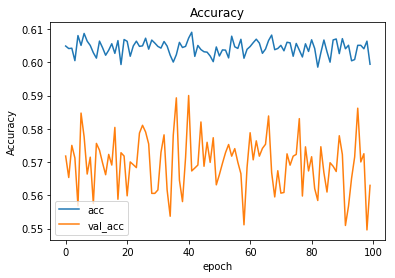

In [38]:
plt.plot(history.history['acc'],label='acc')
plt.plot(history.history['val_acc'], label='val_acc')
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend()

There is a huge scope of improvement I have saved the model and lets see we can try to keep training it more till we cross 70% maybe.Then-
1. Try with a different optimizer with same learning rate if the accuraccy dosent have any effect we reduce the learning rate.
2. I am hoping we can get an accuracy of about 80% if we keep training

In [7]:
json_file = open('bci_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("bci_model.h5")
print("Loaded model from disk")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Loaded model from disk


In [11]:
checkpoint_filepath = 'weights.best.my.hdf5'

my_checkpointer = ModelCheckpoint(filepath=checkpoint_filepath,
                               verbose=1, save_best_only=True)
opt=SGD(lr=.1)
#model.compile(opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
loaded_model.compile(opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
history=loaded_model.fit(X_train, y_train, epochs = 100, batch_size = 10000,validation_data=(X_test,y_test), callbacks=[my_checkpointer], verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 60779 samples, validate on 29936 samples
Epoch 1/100
60779/60779 [==============================] - 3s 51us/step - loss: 1.3286 - acc: 0.5407 - val_loss: 0.8922 - val_acc: 0.7419

Epoch 00001: val_loss improved from inf to 0.89218, saving model to weights.best.my.hdf5
Epoch 2/100
60779/60779 [==============================] - 2s 34us/step - loss: 1.3227 - acc: 0.5392 - val_loss: 0.9136 - val_acc: 0.7360

Epoch 00002: val_loss did not improve from 0.89218
Epoch 3/100
60779/60779 [==============================] - 2s 35us/step - loss: 1.3278 - acc: 0.5421 - val_loss: 0.8905 - val_acc: 0.7472

Epoch 00003: val_loss improved from 0.89218 to 0.89048, saving model to weights.best.my.hdf5
Epoch 4/100
60779/60779 [==============================] - 2s 35us/step - loss: 1.3108 - acc: 0.5458 - val_loss: 0.8860 - val_acc: 0.7435

Epoch 00004: val_loss improved from 0.89048 to 0.88598, saving model to weights.best.my.hdf5
Epoch 5/100
60779/60

60779/60779 [==============================] - 2s 35us/step - loss: 1.2848 - acc: 0.5558 - val_loss: 0.9153 - val_acc: 0.7326

Epoch 00041: val_loss did not improve from 0.86694
Epoch 42/100
60779/60779 [==============================] - 2s 39us/step - loss: 1.2868 - acc: 0.5548 - val_loss: 0.8916 - val_acc: 0.7418

Epoch 00042: val_loss did not improve from 0.86694
Epoch 43/100
60779/60779 [==============================] - 2s 38us/step - loss: 1.2879 - acc: 0.5537 - val_loss: 0.9021 - val_acc: 0.7295

Epoch 00043: val_loss did not improve from 0.86694
Epoch 44/100
60779/60779 [==============================] - 2s 36us/step - loss: 1.2848 - acc: 0.5542 - val_loss: 0.9020 - val_acc: 0.7362

Epoch 00044: val_loss did not improve from 0.86694
Epoch 45/100
60779/60779 [==============================] - 2s 37us/step - loss: 1.2876 - acc: 0.5531 - val_loss: 0.9073 - val_acc: 0.7379

Epoch 00045: val_loss did not improve from 0.86694
Epoch 46/100
60779/60779 [==============================] 

60779/60779 [==============================] - 2s 36us/step - loss: 1.2759 - acc: 0.5576 - val_loss: 0.9017 - val_acc: 0.7331

Epoch 00084: val_loss did not improve from 0.86694
Epoch 85/100
60779/60779 [==============================] - 2s 36us/step - loss: 1.2786 - acc: 0.5554 - val_loss: 0.8897 - val_acc: 0.7366

Epoch 00085: val_loss did not improve from 0.86694
Epoch 86/100
60779/60779 [==============================] - 2s 36us/step - loss: 1.2722 - acc: 0.5574 - val_loss: 0.9388 - val_acc: 0.7159

Epoch 00086: val_loss did not improve from 0.86694
Epoch 87/100
60779/60779 [==============================] - 2s 36us/step - loss: 1.2758 - acc: 0.5564 - val_loss: 0.9201 - val_acc: 0.7219

Epoch 00087: val_loss did not improve from 0.86694
Epoch 88/100
60779/60779 [==============================] - 2s 36us/step - loss: 1.2710 - acc: 0.5583 - val_loss: 0.9350 - val_acc: 0.7169

Epoch 00088: val_loss did not improve from 0.86694
Epoch 89/100
60779/60779 [==============================] 

# Well messed up! 
Since, the train test split randomly assigns the number of train and test splits we are no longer sure if the same sample of training data is being used to fit. Having seen a high accuracy on the validation set I am preety sure we are using old data points which were originally used to train the data to validate. This will be really pointless if we keep pursuing to train more. We will unfortunately have to start from scratch and this time have two data sets. Meanwhile I will try som sk learn algorithms to check one of my hypothesis